In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading the input files
df = pd.read_csv("../../../../../Data/Sequence CSVs/DENV2 - DF.csv", header=None)
dss = pd.read_csv("../../../../../Data/Sequence CSVs/DENV2 - DSS.csv", header=None)
dhf = pd.read_csv("../../../../../Data/Sequence CSVs/DENV2 - DHF.csv", header=None)

# Printing the shape of the data
print("The shape of DF data is:", str(df.shape))
print("The shape of DSS data is:", str(dss.shape))
print("The shape of DHF data is:", str(dhf.shape))

The shape of DF data is: (293, 1)
The shape of DSS data is: (21, 1)
The shape of DHF data is: (110, 1)


In [3]:
# Making the disease label column
df_disease = np.repeat(0, 293)
dss_disease = np.repeat(1, 21)
dhf_disease = np.repeat(1, 110)

# Attaching the "Disease" label column to the input
df["Disease"] = df_disease
dss["Disease"] = dss_disease
dhf["Disease"] = dhf_disease

# Renaming the columns
df = df.rename(index=str, columns={0: "Sequence", "Disease": "Disease"})
dss = dss.rename(index=str, columns={0: "Sequence", "Disease": "Disease"})
dhf = dhf.rename(index=str, columns={0: "Sequence", "Disease": "Disease"})

In [4]:
# Concatinating the input data into one DataFrame
result = pd.concat([df, dss, dhf], axis = 0, sort = False)
print("The combined shape of the given data is:", str(result.shape))

# Taking a peek at the combined data
result = result.sample(frac = 1)
print(result.head())

The combined shape of the given data is: (424, 2)
                                              Sequence  Disease
65   atgaataaccaacgaaaaaaggcgagaagtacgcctttcaatatgc...        0
175  atgaacaaccaacgaaaaaaggcgagaagtacgcctttcaatatgc...        0
80   atgaataaccaacggaaaaaggcgagaagtacgcctttcaatatgc...        0
34   atgaataaccaacggaaaaaggcgaaaaacacgcctttcaatatgc...        1
101  atgaataaccaacggaaaaaggcgaaaaacacgcctttcaatatgc...        1


In [5]:
# Function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size = 6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

result['words'] = result.apply(lambda x: getKmers(x['Sequence']), axis=1)
result = result.drop('Sequence', axis=1)

result_texts = list(result['words'])
for item in range(len(result_texts)):
    result_texts[item] = ' '.join(result_texts[item])

The shape of y is: (424,)


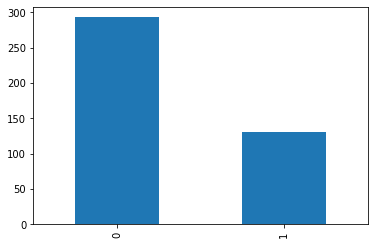

In [6]:
# Creating y and printing the shape of it
y = result.iloc[:, 0].values
print("The shape of y is:", y.shape)

# Checking the balance of the disease severity
result["Disease"].value_counts().sort_index().plot.bar()

In [7]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
x = cv.fit_transform(result_texts)

# Print the shape of x
print("The shape of x matrix is:", x.shape)

The shape of x matrix is: (424, 41110)


## Nested Cross-Validation

In [8]:
from sklearn.model_selection import cross_val_score
# search for an optimal value of K for KNN
# range of k we want to try
k_range = range(1, 20)
# empty list to store scores
k_scores = []

In [9]:
from sklearn.neighbors import KNeighborsClassifier
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors = k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, x, y, cv = 10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
    
    print("The score for number of neighbours =", k, "is:", scores.mean())

The score for number of neighbours = 1 is: 0.9387546561965167
The score for number of neighbours = 2 is: 0.9646682774589751
The score for number of neighbours = 3 is: 0.9670492298399275
The score for number of neighbours = 4 is: 0.9622873250780227
The score for number of neighbours = 5 is: 0.9622873250780227
The score for number of neighbours = 6 is: 0.9622873250780227
The score for number of neighbours = 7 is: 0.9622873250780227
The score for number of neighbours = 8 is: 0.9622873250780227
The score for number of neighbours = 9 is: 0.9622873250780227
The score for number of neighbours = 10 is: 0.9622873250780227
The score for number of neighbours = 11 is: 0.9622873250780227
The score for number of neighbours = 12 is: 0.9622873250780227
The score for number of neighbours = 13 is: 0.9622873250780227
The score for number of neighbours = 14 is: 0.9622873250780227
The score for number of neighbours = 15 is: 0.9622873250780227
The score for number of neighbours = 16 is: 0.9622873250780227
T

Length of list 19
Max of list 0.9670492298399275


Text(0, 0.5, 'Cross-validated accuracy')

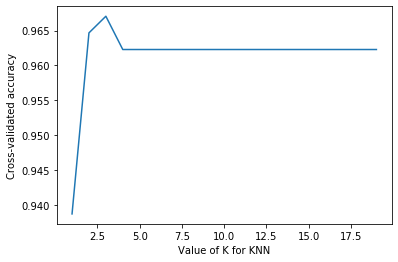

In [10]:
# in essence, this is basically running the k-fold cross-validation method 30 times because
# we want to run through K values from 1 to 30.
# we should have 21 scores here
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')